**Meredith Green**

Spring 2022

CS 252: Mathematical Data Analysis and Visualization

Project 5: Clustering

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: K-means clustering

### 1a) Import `super_simple` data


In [56]:
import pandas as pd

#load to dataframe
ss_df= pd.read_csv("data/super_simple.csv")
print(ss_df.shape)

#convert to ndarray
ss_nd = ss_df.to_numpy()
print(ss_nd.shape)


(30, 2)
(30, 2)


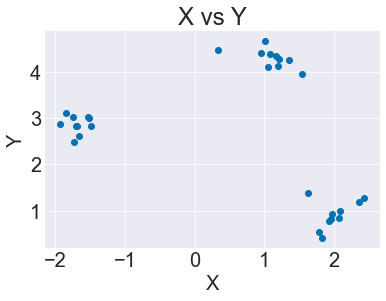

In [4]:
#create scatterplot to visualize

plt.scatter(ss_nd[:,0], ss_nd[:,1])
plt.ylabel("Y")
plt.xlabel("X")
plt.title("X vs Y")
plt.show()

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.


#### Test constructor

In [5]:
cluster = kmeans.KMeans(ss_nd)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [6]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [7]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [8]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63014581273465, 13.45362404707371, 2.23606797749979]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [9]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `assign_labels`

In [10]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.assign_labels(init_centroids)
print(f'After the first assign data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first assign data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids`

In [11]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]


You should see:

    After the first centroid update, your cluster assignments are:
        [[ 1.09087  4.29295]
         [-1.68133  2.85917]
         [ 2.00717  0.9184 ]]
    Your difference from previous centroids:
        [[ 0.75287 -0.17425]
         [ 0.15877 -0.25313]
         [ 0.21407  0.3757 ]]

#### Test `inertia`

In [12]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.10738760429999998
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot. Make sure that the cluster assignment looks like the following image:

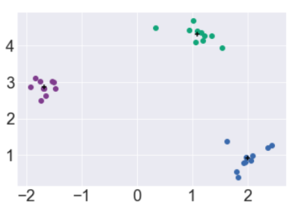

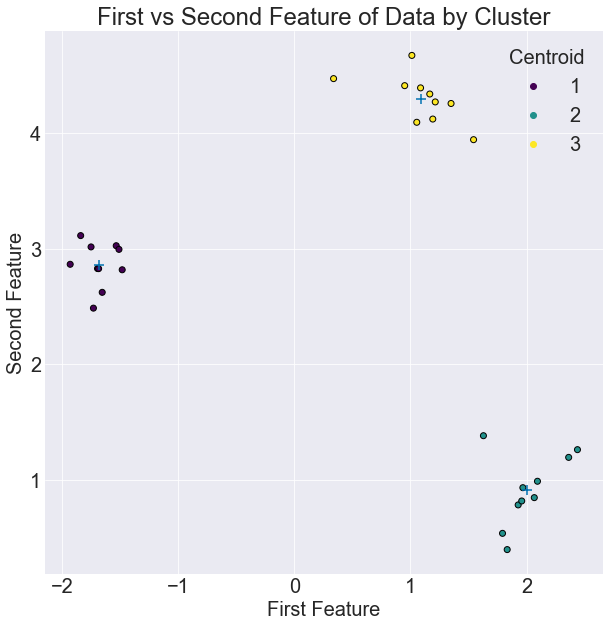

In [13]:
sskm = kmeans.KMeans(ss_nd)
sskm.cluster(3)
sskm.plot_clusters()
plt.show()



### 1c) Determining the number of clusters $k$

- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

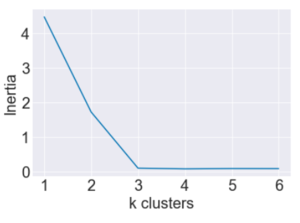

range(1, 7)


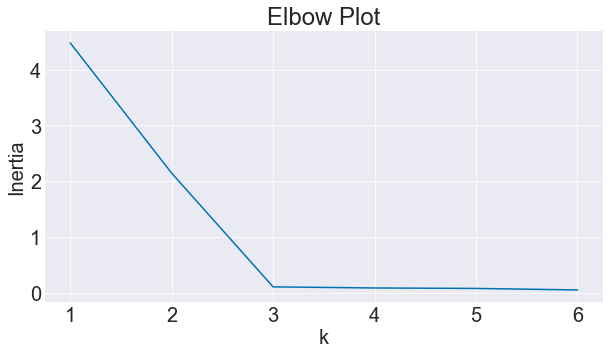

In [16]:
sskm = kmeans.KMeans(ss_nd)
sskm.elbow_plot(6)
plt.show()

Because the inertia drops at 3, it would make sense for this super_simple data to have 3 clusters. The distances would be minimal because of this. With 4,5,6 clusters, the inertia is also good, but it is just breaking up the three clusters into smaller pieces. 

#### Determine number of clusters in `five_blobs` dataset


In [18]:
# Load in the data and put it into a matrix in this cell

#load to dataframe
fb_df= pd.read_csv("data/five_blobs.csv")
print(fb_df.shape)

#convert to ndarray
fb_nd = fb_df.to_numpy()
print(fb_nd.shape)

fbkm = kmeans.KMeans(fb_nd)

(2050, 2)
(2050, 2)


inertia:  (10.094389877943534, 9)


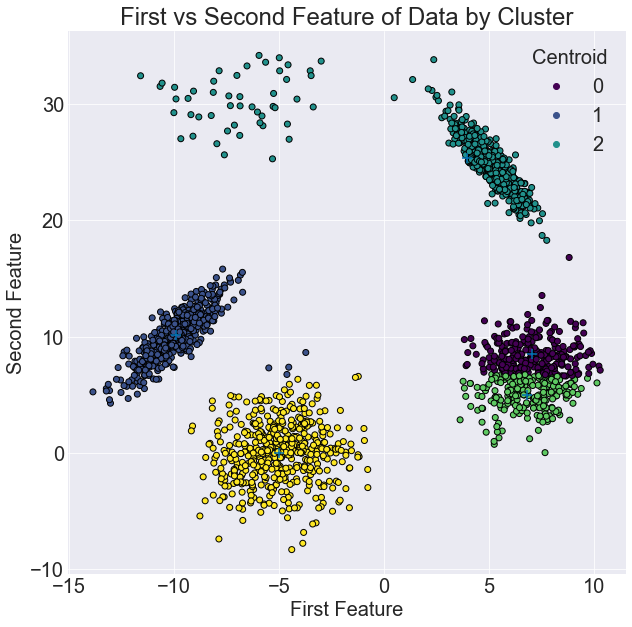

In [ ]:
# Run the clustering algorithm and plot the results for one seed.
np.random.seed(0)
print("inertia: ", fbkm.cluster(5))
fbkm.plot_clusters()

inertia:  (9.980672698266838, 10)


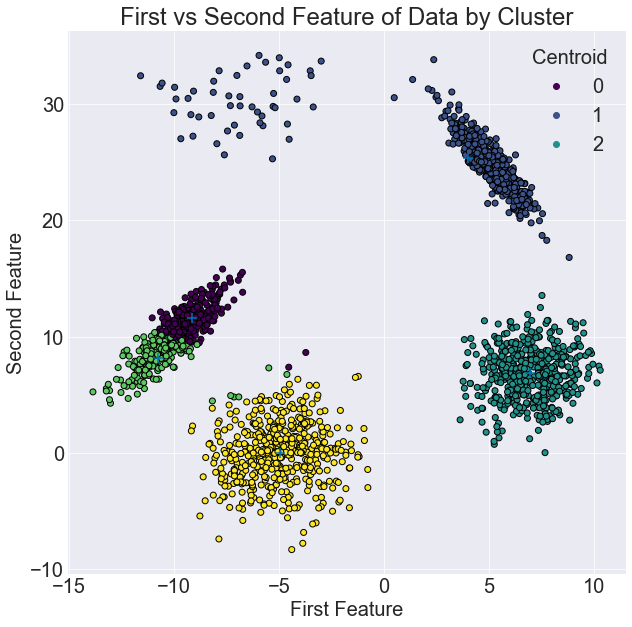

In [ ]:
# Run the clustering algorithm and plot the results for a second seed.
np.random.seed(1)
print("inertia: ", fbkm.cluster(5))
fbkm.plot_clusters()

inertia:  (10.094389877943534, 10)


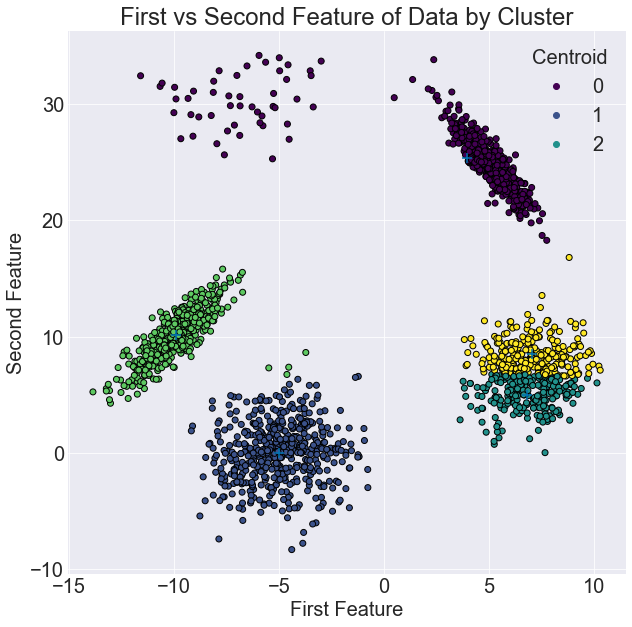

In [ ]:
# Run the clustering algorithm and plot the results for a third seed.
np.random.seed(2)
print("inertia: ", fbkm.cluster(5))
fbkm.plot_clusters()

inertia:  (9.797201783069902, 7)


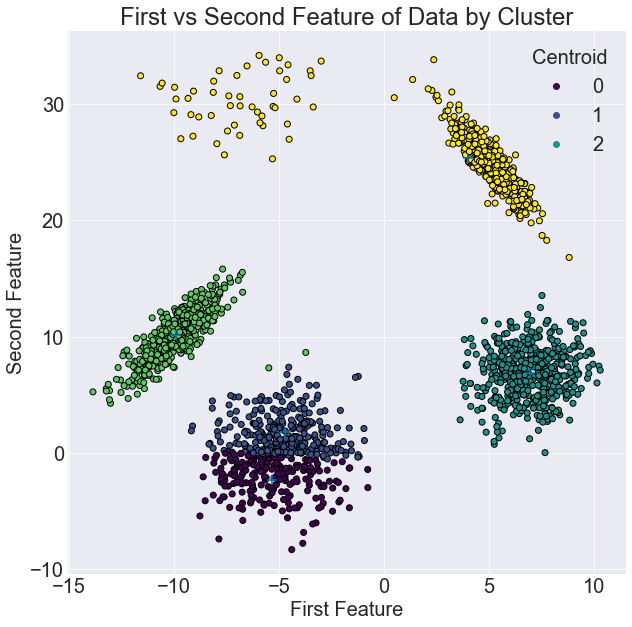

In [ ]:
# Run the clustering algorithm and plot the results for a fourth seed.
np.random.seed(3)
print("inertia: ", fbkm.cluster(5))
fbkm.plot_clusters()

inertia:  (7.115591545930545, 4)


7.115591545930545

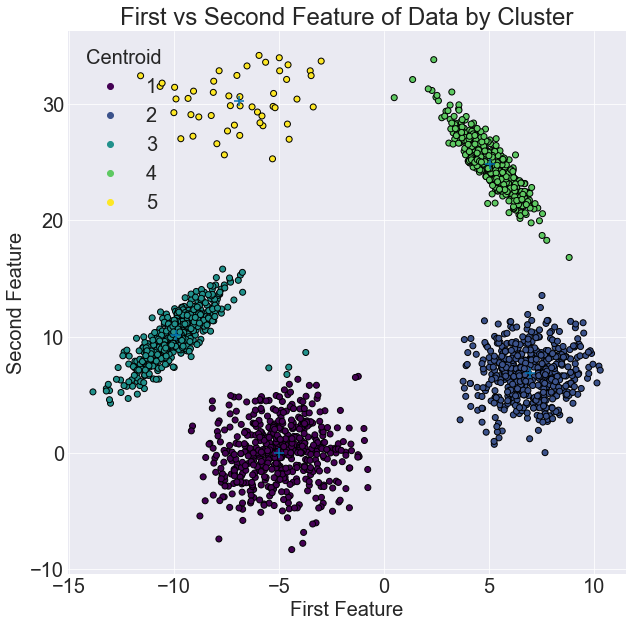

In [ ]:
# Run the clustering algorithm and plot the results for a fifth seed.
np.random.seed(4)
print("inertia: ", fbkm.cluster(5))
fbkm.plot_clusters()

The clusters shown in the scatter plots have different randomized intializations, and therefore have different outputs. Because of how they're initialized, they do not produce an outcome that properly represent the clusters. The inertias make sense for each iamge. The last image has the best representation of the clusters, and therefore has the lowest inertia. The highest inertias were associated with the first and third scatter plots. These should be similar and make sense that they are so high because the found clusters split in half a cluster in the data, which creates a high inertia

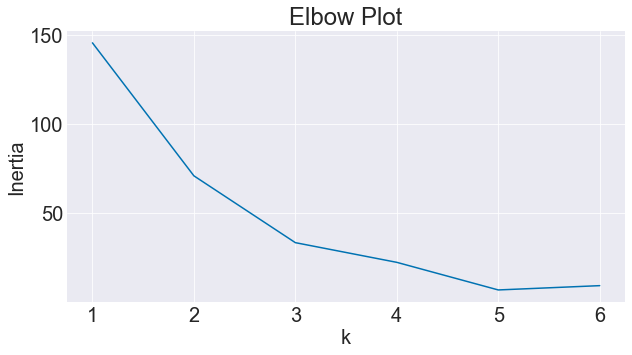

In [ ]:
fbkm = kmeans.KMeans(fb_nd)
fbkm.elbow_plot(6)
plt.show()

This elbow plot has the trend of decreasing inertia with the increase in number of clusters. This makes sense because until we reach five, the model is improving with the increase in number of clusters. After 6, the number of clusters no longer matches the number of clusters in the data, so the inertia wouldn't decrease anymore.

#### Run K-means multiple times, save the best clustering

To address the problems faced above, we can run K-means multiple times and take the best results for our clustering.


Inertia : 7.115591545930545


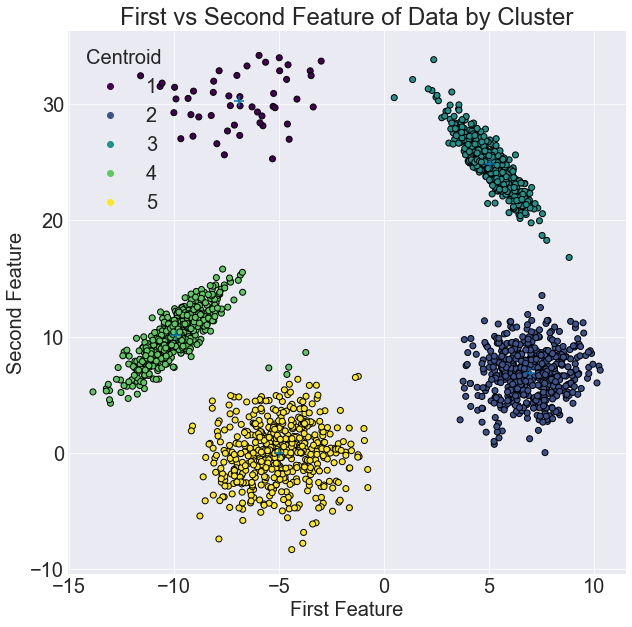

In [ ]:
fbkm = kmeans.KMeans(fb_nd)
fbkm.cluster_batch(5, 10)
print("Inertia :", fbkm.plot_clusters())
plt.show()

The clustering does improves because we essentially eliminate the possibility that a random initialization causes poor clustering. The inertia here is also good, similar to the last of the previous plots, because there is a better chance at good intial centroids.

#### Improve the elbow plot for the `five_blobs` dataset

Implementing cluster batches

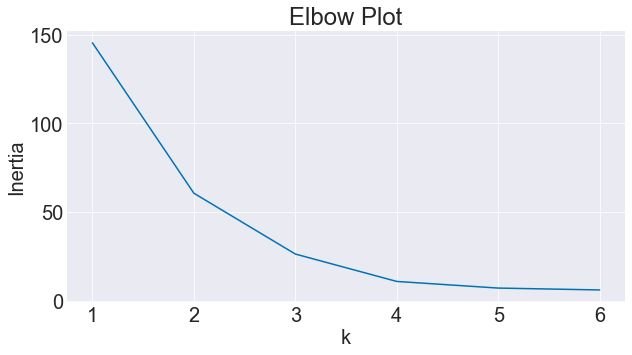

In [24]:
fbkm = kmeans.KMeans(fb_nd)
fbkm.elbow_plot(6, 10)
plt.show()


## Task 2: Improved initialization and cluster detection

### 2a) K-means++ initialization

- In `kmeans.py::initialize_plusplus` implement the K-means++ initialization algorithm.

Recall that the idea is to set the 1st centroid to be a random data sample. To determine each of the remaining centroids, compute the MINIMUM distance from each data sample to ONLY the centroids ALREADY DEFINED. For example, if we're determining centroid 3, we would find the distance between each data sample and the closest centroid (1 or 2...whichever is closer). Then, we use these distances to create a probability distribution. The next centroid is determined by selecting a data sample in the dataset according to this probability distribition. The equation for the probability distribution is:$$p(x_i) = \frac{D(x_i)^2}{\sum_{j=1}^N D(x_j)^2}$$ where $D(x_i)$ is the distance between data sample $x_i$ and the nearest centroid already defined and $N$ is the number of data samples, like usual.

(2050, 2)
kmeans++: 
inertia:  (7.116345982439034, 4)
7.116345982439034


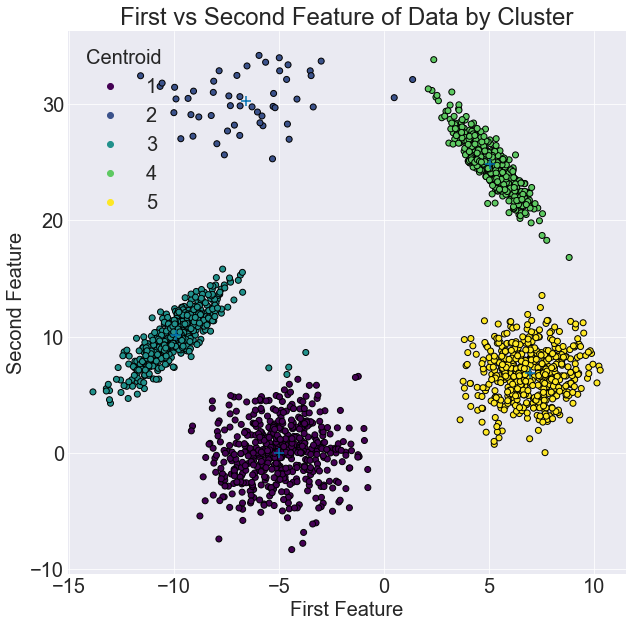

In [58]:
np.random.seed(3)

# Load in the data and put it into a matrix in this cell

#load to dataframe
fb_df= pd.read_csv("data/five_blobs.csv")

#convert to ndarray
fb_nd = fb_df.to_numpy()
print(fb_nd.shape)

fbkm = kmeans.KMeans(fb_nd)

print("kmeans++: ")
print("inertia: ", fbkm.cluster(5, init_method="plusplus"))
print(fbkm.plot_clusters())



(2050, 2)
Random initialization:
inertia:  (9.797201783069902, 7)
9.797201783069902


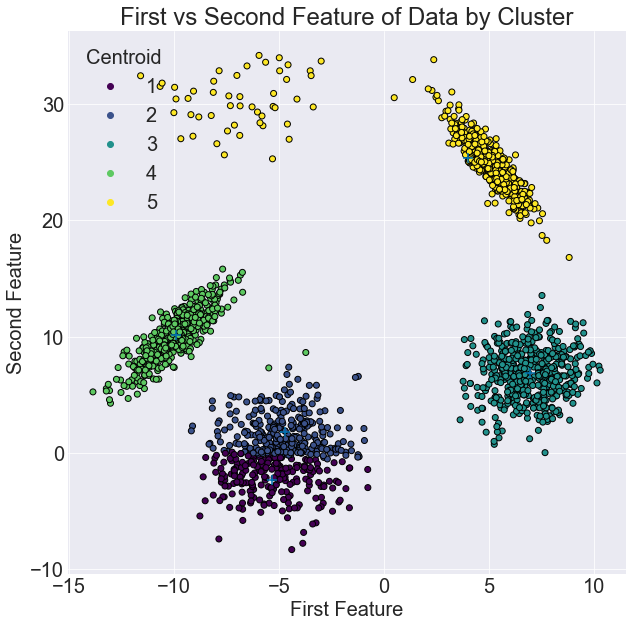

In [59]:
np.random.seed(3)

# Load in the data and put it into a matrix in this cell

#load to dataframe
fb_df= pd.read_csv("data/five_blobs.csv")

#convert to ndarray
fb_nd = fb_df.to_numpy()
print(fb_nd.shape)

fbkm = kmeans.KMeans(fb_nd)

print("Random initialization:")
print("inertia: ", fbkm.cluster(5))
print(fbkm.plot_clusters())

The clustering got better. We can see with kmeans++ and with random initiailization. The kmeans++ does better at selecting initial clusters in a way that reduces the chance of having a worse clustering (for example, if a cluster in the data is split into multiple clusters through kmeans). This also means that the initial clusters are more likely to be closer to where they will end up, and therefore kmeans hopefully converges faster. In the example above, kmeans++ has a better (lower) inertia and a better (fewer) count of iterations until convergence. 

#### Compare number of iterations needed for K-means to converge



In [44]:
np.random.seed(3)

# Load in the data and put it into a matrix in this cell

#load to dataframe
fb_df= pd.read_csv("data/five_blobs.csv")

#convert to ndarray
fb_nd = fb_df.to_numpy()
print(fb_nd.shape)

fbkm = kmeans.KMeans(fb_nd)

print("Random initialization:")
inertia, avecount =  fbkm.cluster_batch(5)
print("Inertia: ", inertia , " and average count for kmeans: ", avecount)


np.random.seed(3)

# Load in the data and put it into a matrix in this cell

#load to dataframe
fb_df= pd.read_csv("data/five_blobs.csv")

#convert to ndarray
fb_nd = fb_df.to_numpy()
print(fb_nd.shape)

fbkm = kmeans.KMeans(fb_nd)

print("Plusplus initialization:")
inertia, avecount =  fbkm.cluster_batch(5, init_method="plusplus")
print("Inertia: ", inertia , " and average count for kmeans: ", avecount)


(2050, 2)
Random initialization:
Inertia:  9.797201783069902  and average count for kmeans:  7.0
(2050, 2)
Plusplus initialization:
Inertia:  7.116345982439034  and average count for kmeans:  4.0


## Task 3: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. 

### 2a) Load in baby bird image


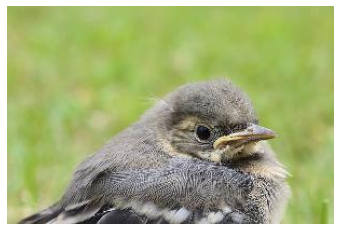

In [24]:
from matplotlib.image import imread
baby_bird = imread('data/baby_bird.jpeg')
plt.imshow(baby_bird)
plt.yticks([])
plt.xticks([])
plt.show()

### 3b) Preprocess image


In [3]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    return img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

In [26]:
bird_flat = flatten(baby_bird)
print( bird_flat.shape)

(61206, 3)


### 3c) Cluster RGB values in image

- Run K-means on the bird data vector

In [27]:
bird_km = kmeans.KMeans(bird_flat)
bird_km.cluster(5)
bird_comp = bird_km.replace_color_with_centroid()

### 3d) Postprocessing and visualization


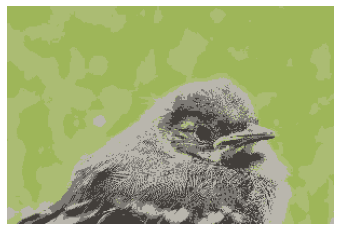

In [28]:
bird_comp = bird_comp.reshape((baby_bird.shape[0], baby_bird.shape[1], baby_bird.shape[2]))
plt.imshow(bird_comp)
plt.yticks([])
plt.xticks([])
plt.show()

### 3e) Run K-means and compress an image of your choice


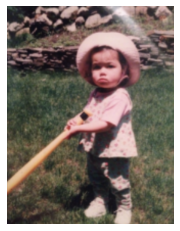

In [3]:
from matplotlib.image import imread
baby_pic = imread('data/baby_pic.jpeg')
plt.imshow(baby_pic)
plt.yticks([])
plt.xticks([])
plt.show()

This is a picture of me as a kid!

In [6]:
baby_flat = flatten(baby_pic)
print(baby_flat.shape)


(96832, 4)


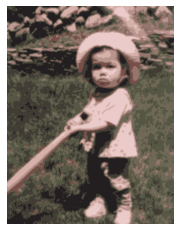

In [7]:
baby_km = kmeans.KMeans(baby_flat)
baby_km.cluster(9)
baby_comp = baby_km.replace_color_with_centroid()
baby_comp = baby_comp.reshape((baby_pic.shape[0], baby_pic.shape[1], baby_pic.shape[2]))
plt.imshow(baby_comp)
plt.yticks([])
plt.xticks([])
plt.show()

## Extensions


Image compression


For my extension, I wanted to do more image compression. While doing the project, I thought of two applications that reminded me of the outputs I was thinking. The first, was a scanner app (I use Genius Scan). This app takes a image of a paper and makes it more comprehendable but making it more contrasted and clear. I used image compression to find two clusters and make one of them black and the other white, and thereofore take an image of writing and make it very clear. The second application that I explored was Photobooth on my mac, and specifically the Thermal Camera effect. I thought I could try the recreate the filter by clustering and then assigning new colors based on the values of the clusters. 
Lastly, I thought the filter reminded me of Andy Warhol artwork, so I made another function to make a picture with 3 centroids have 3 different colors four times. 

First, I worked on my "scanner." Here, I just print out the orignal image of my friend's econ homework which I want to "scan."

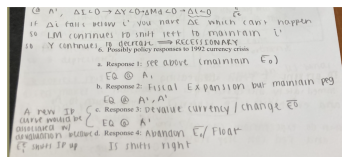

(375560, 4)


In [54]:
from matplotlib.image import imread
original = imread('data/original.jpeg')
plt.imshow(original)
plt.yticks([])
plt.xticks([])
plt.show()

og_flat = flatten(original)
print(og_flat.shape)


I then run cluster with 2 centroids, and print the result.

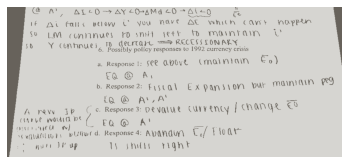

In [55]:
og_km = kmeans.KMeans(og_flat)
og_km.cluster(2)
og_comp = og_km.replace_color_with_centroid()
og_comp =og_comp.reshape((original.shape[0], original.shape[1], original.shape[2]))
plt.imshow(og_comp)
plt.yticks([])
plt.xticks([])
plt.show()

Here, I print the original image, and then my own "scanned" image. To do this, I adapted the replace color with centroid function with a version which assigns the lighter cluster to white and the darker cluster to black. This introduces a lot contrast to the image, and therefore gives the appearance of a scanner app.

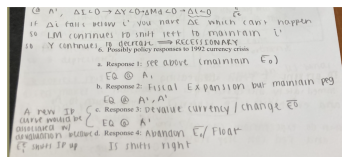

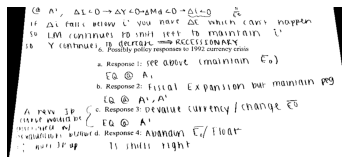

In [12]:
from matplotlib.image import imread
original = imread('data/original.jpeg')
plt.imshow(original)
plt.yticks([])
plt.xticks([])
plt.show()

og_flat = flatten(original)


og_km = kmeans.KMeans(og_flat)
og_km.cluster(2)
og_comp = og_km.replace_color_with_centroid_b_a_w()
og_comp =og_comp.reshape((original.shape[0], original.shape[1], original.shape[2]))
plt.imshow(og_comp)
plt.yticks([])
plt.xticks([])
plt.show()

To compare, this is the output of me putting a similar image into my scanner app. 

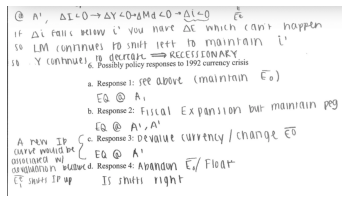

In [15]:
from matplotlib.image import imread
genuis = imread('data/genuis.jpeg')
plt.imshow(genuis)
plt.yticks([])
plt.xticks([])
plt.show()

Next, I made my own version of the thermal camera filter. First, I googled the scale of colors in thermograms, and screenshotted five parts of the color scale. With these five images, I printed the values of a pixel from each to base my colors off of. 

Screenshots from https://www.google.com/search?q=thermogram+coloring+scale&rlz=1C5CHFA_enUS939US940&tbm=isch&source=iu&ictx=1&vet=1&fir=CUBrKdmju8EBCM%252CONokLZuuC1qNAM%252C_%253BWyzrWzaoIDWn6M%252CR7Gmgsb86mzMoM%252C_%253BEC4tm2Nf67m0UM%252C2I8-TLiQcYou2M%252C_%253BE1BS5BuLBWFeXM%252CwOG6kwpgB412nM%252C_%253BmF4_8Lp0tYWpXM%252Cjl6Y68EpPkbo2M%252C_%253BrY29YSjOSblwmM%252CwOG6kwpgB412nM%252C_%253BslW4kgCcpWuuMM%252Cne1zrc5tvRucNM%252C_%253Bv7LJyA54-pCDkM%252CuiR0rpyW7A-_EM%252C_%253BC7OQiQBDVMbOvM%252C9aaUsS6zYsssbM%252C_%253BZHD--29heFSMvM%252CPNKCTz0ZQjDAtM%252C_&usg=AI4_-kR_kjOD5Xy4WeVgL4THSwuSZsKjQQ&sa=X&ved=2ahUKEwiRkdaW7or3AhVlUN8KHdYnAbIQ9QF6BAgcEAE#imgrc=EC4tm2Nf67m0UM&imgdii=5fOUrPp17DhmEM 

Finding values for light blue

In [19]:
from matplotlib.image import imread
lb = imread('data/lightblue.jpeg')
print(lb[5,5])

[0.21569 0.55294 0.96863 1.     ]


Finding values for dark red

In [20]:
from matplotlib.image import imread
dr = imread('data/darkred.jpeg')
print(dr[5,5])

[0.56471 0.11765 0.06667 1.     ]


Finding values for green

In [21]:
from matplotlib.image import imread
green = imread('data/green.jpeg')
print(green[5,5])

[0.4549  0.97255 0.52157 1.     ]


Finding values for dark blue

In [22]:
from matplotlib.image import imread
db = imread('data/darkblue.jpeg')
print(db[5,5])

[0.      0.09804 0.56863 1.     ]


In [23]:
from matplotlib.image import imread
orange = imread('data/orange.jpeg')
print(orange[5,5])

[0.94118 0.55294 0.20392 1.     ]


Next, I did regular image compression on a selfie I took on photobooth while working on this project.

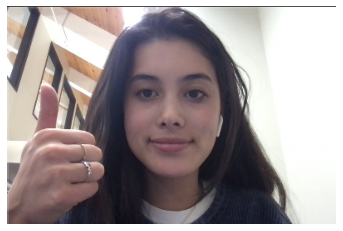

(103752, 4)


In [27]:
from matplotlib.image import imread
selfie = imread('data/selfie.jpeg')
plt.imshow(selfie)
plt.yticks([])
plt.xticks([])
plt.show()

selfie_flat = flatten(selfie)
print(selfie_flat.shape)


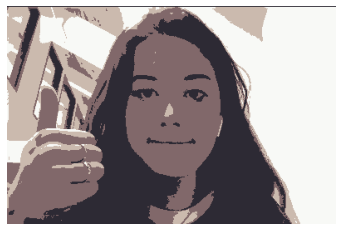

In [28]:
selfie_km = kmeans.KMeans(selfie_flat)
selfie_km.cluster(5)
selfie_comp = selfie_km.replace_color_with_centroid()
selfie_comp =selfie_comp.reshape((selfie.shape[0], selfie.shape[1], selfie.shape[2]))
plt.imshow(selfie_comp)
plt.yticks([])
plt.xticks([])
plt.show()

Then, I did clustering on the same image, but implementing a replace color with centroid function, where the five centroids are replaced with one of the five colors that I found on the thermogram scale. I determined which cluster should be assigned to which color based on the sum of rgb values. 

In [50]:
selfie = imread('data/selfie.jpeg')
selfie_flat = flatten(selfie)

selfie_km = kmeans.KMeans(selfie_flat)
selfie_km.cluster(5)

(0.008868529033167207, 9)

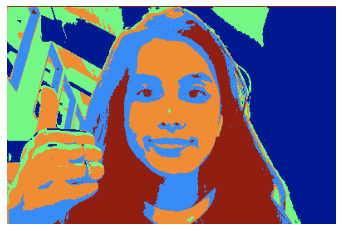

In [51]:
selfie_comp = selfie_km.replace_color_with_centroid_thermo()
selfie_comp =selfie_comp.reshape((selfie.shape[0], selfie.shape[1], selfie.shape[2]))
plt.imshow(selfie_comp)
plt.yticks([])
plt.xticks([])
plt.show()

Here is a photobooth selfie of myself taken with the actual photobooth thermal camera filter, to compare. They're not exactly the same concept, as mine is clustered rather than keeping every point and matching it to a point along the thermogram scale.

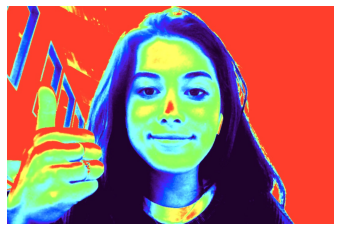

In [52]:
from matplotlib.image import imread
selfie = imread('data/thermal_selfie.jpeg')
plt.imshow(selfie)
plt.yticks([])
plt.xticks([])
plt.show()

Importing an image of my shoe

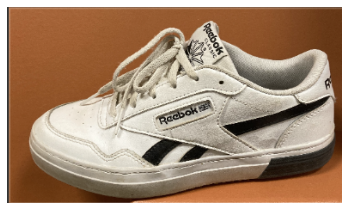

(88920, 4)


In [55]:
from matplotlib.image import imread
shoe = imread('data/shoe.jpeg')
plt.imshow(shoe)
plt.yticks([])
plt.xticks([])
plt.show()

shoe_flat = flatten(shoe)
print(shoe_flat.shape)

Running kmeans with 3 clusters on my shoe

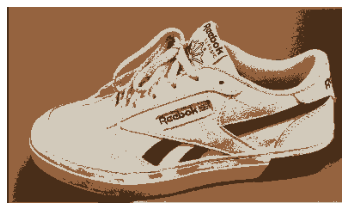

In [62]:
shoe_km = kmeans.KMeans(shoe_flat)
shoe_km.cluster(3)
shoe_comp = shoe_km.replace_color_with_centroid()
shoe_comp =shoe_comp.reshape((shoe.shape[0], shoe.shape[1], shoe.shape[2]))
plt.imshow(shoe_comp)
plt.yticks([])
plt.xticks([])
plt.show()

Taking my shoe and making many with different colors, inspired by Warhol's artwork

In [63]:
shoe_comp_warhol = shoe_km.replace_color_with_centroid_warhol()

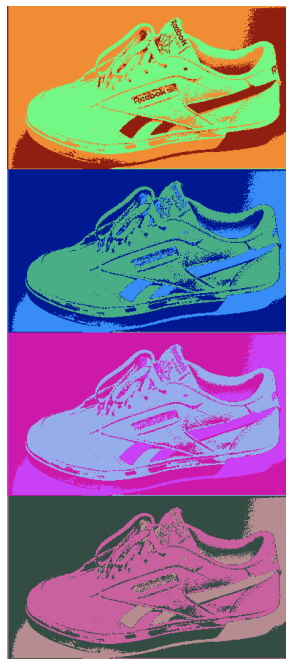

In [64]:

shoe_comp_warhol_reshaped =shoe_comp_warhol.reshape((shoe.shape[0]*4, shoe.shape[1], shoe.shape[2]))
plt.figure(figsize = (5,15))
plt.imshow(shoe_comp_warhol_reshaped)
plt.yticks([])
plt.xticks([])
plt.show()